## Steps Involved in Heart Disease Prediction Project:

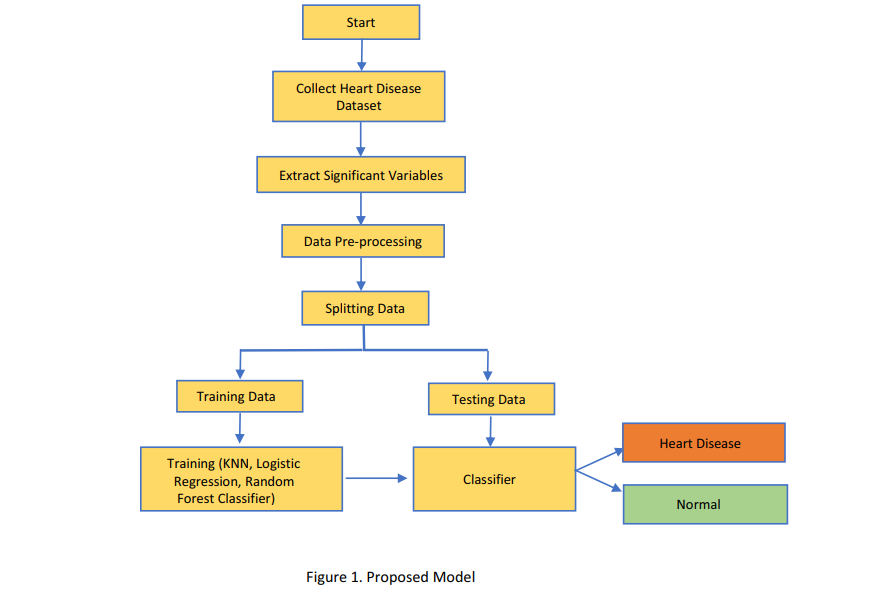


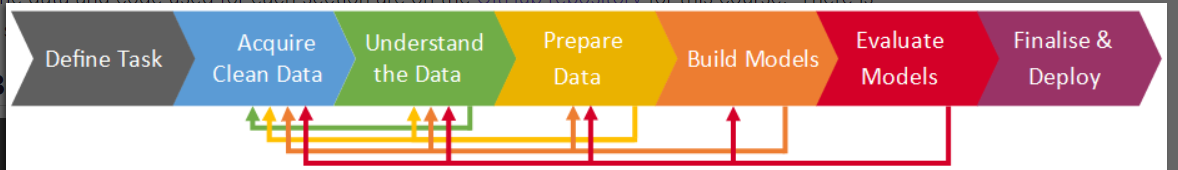

### Import Required Libraries

In [16]:
# Import required Libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

### Read The Dataset

In [17]:
# Data Collection and Pre-Processing:
# Load the Dataset:
df=pd.read_csv('heartdisease.csv')
# getting first 5 rows:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [18]:
#getting last 5 rows:
df.tail()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,25.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [19]:
# check no. of cols and rows in dataset:
df.shape

(253680, 16)

### EDA

In [20]:
# checking info of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [21]:
# To check missing values:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Note: There are no Null/missing values found in dataset.

In [22]:
# To check the Summary Statistics of dataset:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [23]:
# checking len all columns:
len(df.columns)

16

### Univariate Analysis

In [24]:
df.HeartDiseaseorAttack.unique() # checking unique values of a particular column

array([0., 1.])

In [25]:
df.HeartDiseaseorAttack.nunique()

2

In [26]:
# checking number of unique values in each col:
df.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
BMI                     84
Smoker                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
MentHlth                31
PhysHlth                31
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [27]:
# Rename HeartDiseaseorAttack column as Target column
df.rename(columns={'HeartDiseaseorAttack':'target'},inplace=True)

In [28]:
# checking value counts of target column
df.target.value_counts()

target
0.0    229787
1.0     23893
Name: count, dtype: int64

In [29]:
# Checking duplicate rows:
duplicates=df[df.duplicated()]
print('Duplicate Rows:',len(duplicates))

Duplicate Rows: 42852


### There are 42852 duplicate rows in dataset

In [30]:
# Dropping the duplicate rows:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(210828, 16)

In [32]:
# % of distribution of values:
df.target.value_counts()/len(df)*100

target
0.0    88.927941
1.0    11.072059
Name: count, dtype: float64

### Note: class 1 is 11%

- Note: It's clearly a class imbalance problem

In [41]:
X=df.drop('target',axis=1)
X

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [42]:
y=df.target
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: target, Length: 210828, dtype: float64

### Tackling Class imbalance problem with SMOTE 
- An Oversampling technique

In [33]:
!pip install imbalanced-learn 

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE

In [35]:
oversample_data = SMOTE()

In [43]:
X_smote,y_smote=oversample_data.fit_resample(X,y)

In [44]:
print(X_smote.shape)

(374970, 15)


In [45]:
y_smote.value_counts()

target
0.0    187485
1.0    187485
Name: count, dtype: int64

In [46]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.3,
                                                                       random_state=22)

In [47]:
print('shape of X_train',X_train_smote.shape)
print('shape of X_train',X_test_smote.shape)
print('shape of X_train',y_train_smote.shape)
print('shape of X_train',y_test_smote.shape)

shape of X_train (262479, 15)
shape of X_train (112491, 15)
shape of X_train (262479,)
shape of X_train (112491,)


In [48]:
logreg_model_smote = LogisticRegression(solver='liblinear')
logreg_model_smote.fit(X_train_smote,y_train_smote)

LogisticRegression(solver='liblinear')

In [49]:
y_pred_test_smote=logreg_model_smote.predict(X_test_smote)
print('Accuracy',accuracy_score(y_test_smote,y_pred_test_smote))

Accuracy 0.749055479993955


In [50]:
y_pred_train_smote=logreg_model_smote.predict(X_train_smote)

In [51]:
print('Accuracy',accuracy_score(y_train_smote,y_pred_train_smote))

Accuracy 0.7462692253475516


In [52]:
df.select_dtypes(include=['float64','int64'])

,target,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### countplot
- To be used only for categorical variables.

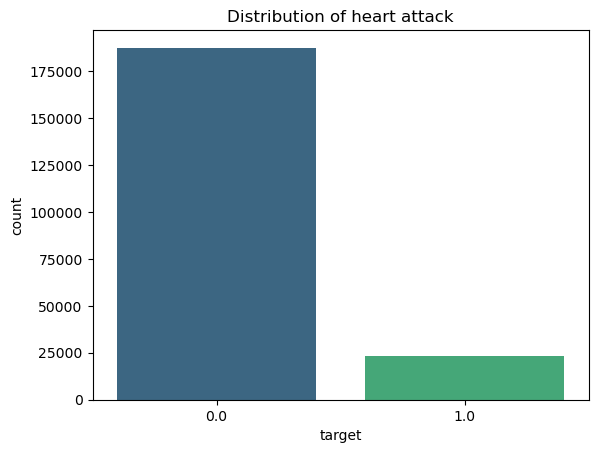

In [53]:
sns.countplot(x='target',data=df,palette='viridis') # x=class or categorical variable 
plt.title('Distribution of heart attack')
plt.show()

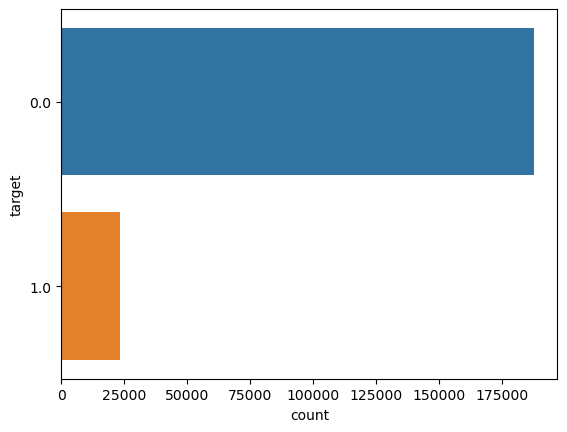

In [54]:
sns.countplot(y='target',data=df)
plt.show()

In [55]:
# separate features and target
X=df.drop('target',axis=1)
y=df.target

In [56]:
# Data scaling
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(X)

In [59]:
# split data into x-train x-test y-train y-test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [60]:
X_train.shape,X_test.shape

((168662, 15), (42166, 15))

In [61]:
y_train.shape,y_test.shape

((168662,), (42166,))

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred=rf.predict(X_test)
print('Random forest accuracy',accuracy_score(y_test,y_pred))

Random forest accuracy 0.8727647867950481


In [64]:
rf_train_score=rf.score(X_train,y_train)
rf_train_score

0.9909048866964698

In [65]:
rf_test_score=rf.score(X_test,y_test)
rf_test_score

0.8727647867950481

In [66]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[36463,   975],
       [ 4390,   338]], dtype=int64)

In [67]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     37438
         1.0       0.26      0.07      0.11      4728

    accuracy                           0.87     42166
   macro avg       0.57      0.52      0.52     42166
weighted avg       0.82      0.87      0.84     42166



### XGBOOST

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [69]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred=xg.predict(X_test)
print('XGBClassifier accuracy',accuracy_score(y_test,y_pred))

XGBClassifier accuracy 0.886093060759854


### Logistic Regression

In [71]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_pred = lr.predict(X_test)
print('LogisticRegression accuracy',accuracy_score(y_test,y_pred))

LogisticRegression accuracy 0.8879191765877721


### KNN

In [73]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [74]:
y_pred=knn6.predict(X_test)
print('KNN accuracy',accuracy_score(y_test,y_pred))

KNN accuracy 0.8819190817246122
